# This is Mutli Text Classfication problem for the given complaints from the multiple sources and need to Implement with ML && DL Algorithms

### we will follw the below workflow steps to achive this problem statement
<img src="images/ml101-6-step-ml-framework.png">

#### Need to follow below steps for every problem 
1. Problem Definition
2. Data & Exploratory Data Analysis
3. Evaluation Matrix
4. Feature Selection
5. Modeling
6. Experiments


### 1. Problem Definition
we need to classify the given text inputs to respective class, this is multi calss text classfication problem

### 2.Data Collection and EDA
Need to load the data and need to perfrom EDA

In [1]:
#Load The data
import pandas as pd
df=pd.read_csv("data\consumer_complaints.csv")
df.head(5)


C:\AI\ML_Practice\NLP_Problesm_Using_ML_DL\env\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [2]:
#Check if any null values and counts of null values
df.isna().sum()

date_received                        0
product                              0
sub_product                     158322
issue                                0
sub_issue                       343335
consumer_complaint_narrative    489151
company_public_response         470833
company                              0
state                             4887
zipcode                           4505
tags                            477998
consumer_consent_provided       432499
submitted_via                        0
date_sent_to_company                 0
company_response_to_consumer         0
timely_response                      0
consumer_disputed?                   0
complaint_id                         0
dtype: int64

In [3]:
66806+489151

555957

In [4]:
#verify the column types and values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

In [5]:
#Output label counts
df['product'].value_counts()

Mortgage                   186475
Debt collection            101052
Credit reporting            91854
Credit card                 66468
Bank account or service     62563
Consumer Loan               20990
Student loan                15839
Payday loan                  3877
Money transfers              3812
Prepaid card                 2470
Other financial service       557
Name: product, dtype: int64

In [6]:
#Drop the values of null value columns based on consumer_complaint_narrative
df=df.dropna(subset=["consumer_complaint_narrative"],axis=0,inplace=False)

In [7]:
df.isna().sum()

date_received                       0
product                             0
sub_product                     20455
issue                               0
sub_issue                       33874
consumer_complaint_narrative        0
company_public_response         34030
company                             0
state                             186
zipcode                           189
tags                            55389
consumer_consent_provided           0
submitted_via                       0
date_sent_to_company                0
company_response_to_consumer        0
timely_response                     0
consumer_disputed?                  0
complaint_id                        0
dtype: int64

In [8]:
#Create a Data frame with only 2 columns consumer_complaint_narrative,product
cols=["consumer_complaint_narrative","product"]
df_data=df[cols].sample(frac=0.4)

In [9]:
#Create a separate column category_id againest Product columns to map with each type with one number and 
#add that column to Data Frame
df_data["category_id"],cat_mappings=df_data["product"].factorize()

In [10]:
df_data

,consumer_complaint_narrative,product,category_id
325381,XXXX/XXXX/XXXX GM FINANCIAL ACC # XXXX Late Da...,Consumer Loan,0
551459,XXXX XXXX XXXX XXXX XXXX XXXX XXXX VA XXXX XXX...,Credit reporting,1
504372,I had a federal tax lien of {$42000.00} filed ...,Credit reporting,1
217377,Please do not assume this is a duplicate becau...,Debt collection,2
284074,My mom passed in XX/XX/XXXX and we discovered ...,Mortgage,3
...,...,...,...
309646,"I order an item on XXXX, attempted to pay it w...",Other financial service,10
299216,I notified Equifax in regards to information t...,Credit reporting,1
514667,mortgage company ( Seterus ) will not stop cal...,Mortgage,3
537771,My social security number is totally different...,Credit reporting,1


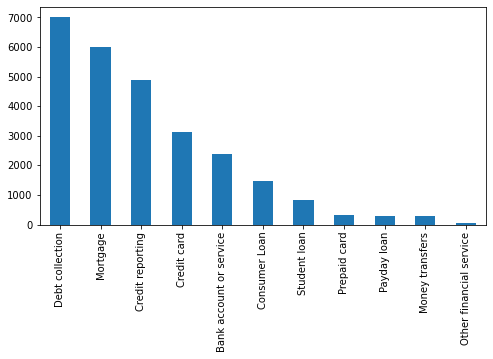

In [11]:
#Plot the bar grapgh againest label counts soum
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,4))
df_data["product"].value_counts().plot.bar()
plt.show()

In [12]:
len(df_data)

26722

In [13]:
#Features Extraction from Text using TF-IDF,BOW
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

tfidf=TfidfVectorizer(sublinear_tf=True,stop_words='english',min_df=5,norm='l2',ngram_range=(1,2),encoding='latin-1')
features=tfidf.fit_transform(df_data.consumer_complaint_narrative).toarray()
labels=df_data.category_id
features.shape


(26722, 68200)

In [14]:
(((features.size*features.itemsize)/1024)/1024)/1024

13.5782390832901

In [15]:
df_data

,consumer_complaint_narrative,product,category_id
325381,XXXX/XXXX/XXXX GM FINANCIAL ACC # XXXX Late Da...,Consumer Loan,0
551459,XXXX XXXX XXXX XXXX XXXX XXXX XXXX VA XXXX XXX...,Credit reporting,1
504372,I had a federal tax lien of {$42000.00} filed ...,Credit reporting,1
217377,Please do not assume this is a duplicate becau...,Debt collection,2
284074,My mom passed in XX/XX/XXXX and we discovered ...,Mortgage,3
...,...,...,...
309646,"I order an item on XXXX, attempted to pay it w...",Other financial service,10
299216,I notified Equifax in regards to information t...,Credit reporting,1
514667,mortgage company ( Seterus ) will not stop cal...,Mortgage,3
537771,My social security number is totally different...,Credit reporting,1


In [16]:

from io import StringIO
category_id_df=df_data[["product","category_id"]].drop_duplicates().sort_values("category_id")
category_to_id=dict(category_id_df.values)
id_to_category=dict(category_id_df[["category_id","product"]].values)

In [17]:
category_to_id

{'Consumer Loan': 0,
 'Credit reporting': 1,
 'Debt collection': 2,
 'Mortgage': 3,
 'Student loan': 4,
 'Credit card': 5,
 'Bank account or service': 6,
 'Money transfers': 7,
 'Payday loan': 8,
 'Prepaid card': 9,
 'Other financial service': 10}

In [18]:
id_to_category

{0: 'Consumer Loan',
 1: 'Credit reporting',
 2: 'Debt collection',
 3: 'Mortgage',
 4: 'Student loan',
 5: 'Credit card',
 6: 'Bank account or service',
 7: 'Money transfers',
 8: 'Payday loan',
 9: 'Prepaid card',
 10: 'Other financial service'}

In [19]:
id_to_category[8]

'Payday loan'

In [20]:
"""
#Feature Selection from chi2
from sklearn.feature_selection import chi2
import numpy as np

N=2
for product,category_id in sorted(category_to_id.items()):
    features_chi2=chi2(features,labels==category_id)
    indices=np.argsort(features_chi2[0])
    feature_names=np.array(tfidf.get_feature_names())[indices]
    unigram=[v for v in feature_names if len(v.split(' '))==1][:N]
    bigram=[v for v in feature_names if len(v.split(' '))==2][:N]
    print("# '{}':".format(product))
    print("    .most correlated unigrams:\n         .{}".format('\n       .'.join(unigram[-N:])))
    print("    .most correlated biigrams:\n         .{}".format('\n       .'.join(bigram[-N:])))
    
"""

'\n#Feature Selection from chi2\nfrom sklearn.feature_selection import chi2\nimport numpy as np\n\nN=2\nfor product,category_id in sorted(category_to_id.items()):\n    features_chi2=chi2(features,labels==category_id)\n    indices=np.argsort(features_chi2[0])\n    feature_names=np.array(tfidf.get_feature_names())[indices]\n    unigram=[v for v in feature_names if len(v.split(\' \'))==1][:N]\n    bigram=[v for v in feature_names if len(v.split(\' \'))==2][:N]\n    print("# \'{}\':".format(product))\n    print("    .most correlated unigrams:\n         .{}".format(\'\n       .\'.join(unigram[-N:])))\n    print("    .most correlated biigrams:\n         .{}".format(\'\n       .\'.join(bigram[-N:])))\n    \n'

In [21]:
df_data

,consumer_complaint_narrative,product,category_id
325381,XXXX/XXXX/XXXX GM FINANCIAL ACC # XXXX Late Da...,Consumer Loan,0
551459,XXXX XXXX XXXX XXXX XXXX XXXX XXXX VA XXXX XXX...,Credit reporting,1
504372,I had a federal tax lien of {$42000.00} filed ...,Credit reporting,1
217377,Please do not assume this is a duplicate becau...,Debt collection,2
284074,My mom passed in XX/XX/XXXX and we discovered ...,Mortgage,3
...,...,...,...
309646,"I order an item on XXXX, attempted to pay it w...",Other financial service,10
299216,I notified Equifax in regards to information t...,Credit reporting,1
514667,mortgage company ( Seterus ) will not stop cal...,Mortgage,3
537771,My social security number is totally different...,Credit reporting,1


In [22]:
df_data[2:3]

,consumer_complaint_narrative,product,category_id
504372,I had a federal tax lien of {$42000.00} filed ...,Credit reporting,1


In [23]:
#Split the Data in to train and test sets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
bwcv=CountVectorizer()

x=bwcv.fit_transform(df_data["consumer_complaint_narrative"])
tfidf_transformer=TfidfTransformer()
print(x.shape)
x_tdf=tfidf_transformer.fit_transform(x)
print(x_tdf.shape)
x_train,x_test,y_train,y_test=train_test_split(x,df_data["category_id"])

(26722, 34004)
(26722, 34004)


In [24]:
#Apply model NB
gbmdl=MultinomialNB().fit(x_train,y_train)

In [25]:
y_pred=gbmdl.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

acc_score=accuracy_score(y_test,y_pred)
print(acc_score)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7953899116898668
[[ 178   35   71   39    2   30   15    0    0    0    0]
 [   5 1033  116   23    1   29    7    0    0    0    0]
 [  18  184 1482   38    6   46   11    0    0    0    0]
 [   3   32   24 1431    0   12   14    0    0    0    0]
 [   6    7   43   20  117    6    1    0    0    0    0]
 [   4   66   69    6    1  586   33    0    0    0    0]
 [   4   18   16   20    0   63  484    0    0    1    0]
 [   1    1    9    1    0    6   50    2    0    0    0]
 [  18    6   30    7    1    2    7    0    0    0    0]
 [   1    0    1    0    0   20   51    0    0    1    0]
 [   0    0    3    0    0    2    5    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.75      0.48      0.59       370
           1       0.75      0.85      0.80      1214
           2       0.80      0.83      0.81      1785
           3       0.90      0.94      0.92      1516
           4       0.91      0.58      0.71       200
           5     

C:\AI\ML_Practice\NLP_Problesm_Using_ML_DL\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
acc_score

0.7953899116898668

In [28]:
k=bwcv.transform(["I am being charged for something I did n't get"])
print(k.shape)
print(x_test[1].shape)

(1, 34004)
(1, 34004)


In [29]:
#Test the model with some sample predictions
sample_pred=gbmdl.predict(bwcv.transform(["for my education"]))
print(id_to_category[int(sample_pred)])

Student loan


In [30]:
id_to_category

{0: 'Consumer Loan',
 1: 'Credit reporting',
 2: 'Debt collection',
 3: 'Mortgage',
 4: 'Student loan',
 5: 'Credit card',
 6: 'Bank account or service',
 7: 'Money transfers',
 8: 'Payday loan',
 9: 'Prepaid card',
 10: 'Other financial service'}

In [31]:
#Apply Random Forest Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

models=[LinearSVC()]

In [33]:
CV=5
cv_df=pd.DataFrame(index=range(CV*len(models)))
entries=[]
for model in models:
    model_name=model.__class__.__name__
    print(model_name)
    accuraices=cross_val_score(model,features,labels,scoring="accuracy",cv=CV)
    print(accuraices)
    for fold_idx,accuracy in enumerate(accuraices):
        entries.append((model_name,fold_idx,accuracy))
cv_df=pd.DataFrame(entries,columns=["model_name","fold_idx","accuracy"])
print(cv_df)    

LinearSVC
[0.85275959 0.85949486 0.85441617 0.85348054 0.84805389]
  model_name  fold_idx  accuracy
0  LinearSVC         0  0.852760
1  LinearSVC         1  0.859495
2  LinearSVC         2  0.854416
3  LinearSVC         3  0.853481
4  LinearSVC         4  0.848054


In [34]:
cv_df


,model_name,fold_idx,accuracy
0,LinearSVC,0,0.852760
1,LinearSVC,1,0.859495
2,LinearSVC,2,0.854416
3,LinearSVC,3,0.853481
4,LinearSVC,4,0.848054


In [36]:
#Apply Logistic Regression Mode
type(features)

numpy.ndarray

In [ ]:
#plot the boxplot againest RF vs LR model using seabaron

In [ ]:
#Display the all the model accuracies mean

In [ ]:
#apply lenar SVC

In [ ]:
#Get the confusion matrix